In [1]:
from __future__ import print_function, division
%run ../basics.ipynb

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['show_config']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loading BokehJS ...

Using TensorFlow backend.


In [29]:
df = pd.read_csv('../data/learning_resources.csv')
display(df.head(2))
tags = pd.read_csv('../data/tags.csv')
print(len(pd.unique(tags['id'])))
display(tags.head(2))
df['tags'] = df['id'].apply(lambda x: (' '.join(tags[tags['id'] == x]['concept_tag'].values.tolist())).strip())
df['tags'] = df['tags'].str.strip()
print('tagged res.:', df['tags'].apply(lambda x: x != '').sum())
print(df.columns)
print(df.count()/len(df)*100)
df.head(2)

,id,title,subtitle,description,short_description,syllabus,url,slug,difficulty,created,...,available,end_date,typical_learning_time,rating,price,new,language,format,license,venue
0,cs101,Intro to Computer Science,Build a Search Engine & a Social Network,In this introduction to computer programming c...,Learn key computer science concepts in this in...,###Lesson 1: How to Get Started\n\n- Interview...,https://www.udacity.com/course/intro-to-comput...,intro-to-computer-science--cs101,beginner,NaN,...,NaN,NaN,3months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity
1,ud257,A/B Testing,Online Experiment Design and Analysis,This course will cover the design and analysis...,This course will cover the design and analysis...,### Lesson 1: Overview of A/B Testing\nThis le...,https://www.udacity.com/course/ab-testing--ud2...,ab-testing--ud257,intermediate,NaN,...,NaN,NaN,1months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity


356


,id,shortname,concept_tag,url
0,ud257,ab-testing--ud257,video_lecture,https://www.udacity.com/course/ab-testing--ud2...
1,ud257,ab-testing--ud257,in_depth,https://www.udacity.com/course/ab-testing--ud2...


tagged res.: 356
Index([u'id', u'title', u'subtitle', u'description', u'short_description',
       u'syllabus', u'url', u'slug', u'difficulty', u'created',
       u'date_modified', u'date_published', u'available', u'end_date',
       u'typical_learning_time', u'rating', u'price', u'new', u'language',
       u'format', u'license', u'venue', u'tags'],
      dtype='object')
id                       100.000000
title                     99.781659
subtitle                  25.545852
description               85.152838
short_description          3.711790
syllabus                  10.043668
url                      100.000000
slug                     100.000000
difficulty                24.235808
created                   44.978166
date_modified              0.000000
date_published            44.978166
available                 44.978166
end_date                   0.000000
typical_learning_time     44.104803
rating                    17.685590
price                     98.689956
new           

,id,title,subtitle,description,short_description,syllabus,url,slug,difficulty,created,...,end_date,typical_learning_time,rating,price,new,language,format,license,venue,tags
0,cs101,Intro to Computer Science,Build a Search Engine & a Social Network,In this introduction to computer programming c...,Learn key computer science concepts in this in...,###Lesson 1: How to Get Started\n\n- Interview...,https://www.udacity.com/course/intro-to-comput...,intro-to-computer-science--cs101,beginner,NaN,...,NaN,3months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity,video_lecture project overview computer_scienc...
1,ud257,A/B Testing,Online Experiment Design and Analysis,This course will cover the design and analysis...,This course will cover the design and analysis...,### Lesson 1: Overview of A/B Testing\nThis le...,https://www.udacity.com/course/ab-testing--ud2...,ab-testing--ud257,intermediate,NaN,...,NaN,1months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity,video_lecture in_depth project data_collection...


In [32]:
p_df = pd.read_csv('../data/prereq.csv')
p_df = p_df[(p_df['resource_id'] != p_df['prerequisite_id']) & (p_df['prerequisite_id'].notnull())]
print(len(pd.unique(p_df['resource_id'])))
df['prereq'] = df['id'].apply(lambda x: (' '.join(p_df[p_df['resource_id'].str.strip() == x.strip()]['prerequisite_id'].values.tolist())).strip())
df['prereq'] = df['prereq'].apply(lambda x: x if len(x.strip()) else np.nan)
print(df.count())
print(set(p_df['resource_id'].values) - set(df['id'].values))
df.head(2)

57
id                       458
title                    457
subtitle                 117
description              390
short_description         17
syllabus                  46
url                      458
slug                     458
difficulty               111
created                  206
date_modified              0
date_published           206
available                206
end_date                   0
typical_learning_time    202
rating                    81
price                    452
new                        0
language                 458
format                   458
license                  357
venue                    458
tags                     458
prereq                    11
dtype: int64
set(['ud876-4', 'ud421', 'ud876-2', 'ud876-3', 'ud245', 'ud585', 'ud405', 'ud893', 'ud892', 'ud876-5', 'ud549', 'ud719', 'ud990', 'ud775', 'ud804', 'cs313', 'ud876-1', 'ud325', 'ud862', 'ud805', 'ud860', 'cs253', 'cs373', 'ud723', 'ud388', 'cs271', 'ud867', 'ud788', 'ud802', 'ud436', 'ud

,id,title,subtitle,description,short_description,syllabus,url,slug,difficulty,created,...,typical_learning_time,rating,price,new,language,format,license,venue,tags,prereq
0,cs101,Intro to Computer Science,Build a Search Engine & a Social Network,In this introduction to computer programming c...,Learn key computer science concepts in this in...,###Lesson 1: How to Get Started\n\n- Interview...,https://www.udacity.com/course/intro-to-comput...,intro-to-computer-science--cs101,beginner,NaN,...,3months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity,video_lecture project overview computer_scienc...,NaN
1,ud257,A/B Testing,Online Experiment Design and Analysis,This course will cover the design and analysis...,This course will cover the design and analysis...,### Lesson 1: Overview of A/B Testing\nThis le...,https://www.udacity.com/course/ab-testing--ud2...,ab-testing--ud257,intermediate,NaN,...,1months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity,video_lecture in_depth project data_collection...,ud201 ud827


In [4]:
class CLF(object):
    def __init__(self, n_topics=20):
        self.n_topics = n_topics
        self.vectorizer = TfidfVectorizer(stop_words='english', max_df=0.6, min_df=5, ngram_range=(1 ,3))
        self.nmf = NMF(n_components=n_topics, random_state=2016)
        self.clf = None
        self.topic_dict = None

    def fit_transform(self, X, viz=True):
        orig_X = X.copy()
        X = self.prepare_X(X)
        X = self.vectorize_X(X, fit=True, viz=viz)
        if viz:
            try:
                tsne_plot(X, orig_X[[orig_X.columns[0]]], fit=True)
            except:
                print(traceback.format_exc())
        return X
        
    def transform(self, X, viz=False):
        orig_X = X.copy()
        X = self.prepare_X(X)
        X = self.vectorize_X(X, fit=False, viz=viz)
        if viz:
            try:
                tsne_plot(X, orig_X[[orig_X.columns[0]]], fit=True)
            except:
                print(traceback.format_exc())
        return X
    
    @staticmethod
    def prepare_X(X):
        if isinstance(X, pd.DataFrame):
            concat_x = pd.Series(index=X.index, data='')
            for i in X.columns:
                concat_x += ' ' + X[i].apply(text_cleanup)
            X = concat_x
        else:
            assert isinstance(X, pd.Series)
        return X
        
    def vectorize_X(self, X, fit=False, viz=False):
        if fit:
            tfidf = self.vectorizer.fit_transform(X.values)
        else:
            tfidf = self.vectorizer.transform(X.values)
        tfidf, words = filter_word_rep(tfidf, self.vectorizer.get_feature_names())
        print('tfidf shape', tfidf.shape)
        # tfidf = (tfidf > 0.).astype('float')
        
        if fit:
            nmf = self.nmf.fit_transform(tfidf)
            feature_names = words
            n_top_words = 50
            self.topic_dict = dict()
            for topic_idx, topic in enumerate(self.nmf.components_):
                topic_top_words = [feature_names[i]
                                for i in topic.argsort()[:-n_top_words - 1:-1]]
                topic_top_words_vals = sorted(topic.ravel(), reverse=True)[:n_top_words]
                text_freq = zip(topic_top_words, topic_top_words_vals)
                if viz:
                    print("v v v v \tTopic #%d\t" % topic_idx, end='v v v v v')
                    wordcloud(text_freq)
                topic_top_words = ", ".join(topic_top_words)
                #print(topic_top_words)
                self.topic_dict[topic_idx] = text_freq
            if viz:
                viz_nmf_output(nmf)
        else:
            nmf = self.nmf.transform(tfidf)
        print('nmf shape:', nmf.shape)
        return nmf

# resources: 458
tfidf shape (458, 2426)
v v v v 	Topic #0	v v v v v

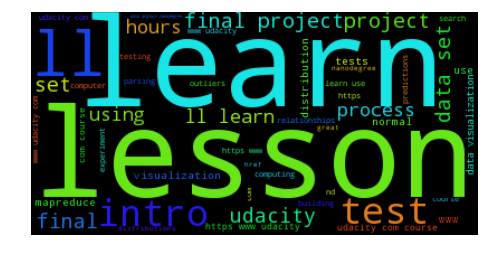

v v v v 	Topic #1	v v v v v

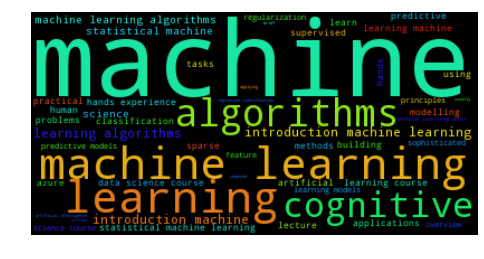

v v v v 	Topic #2	v v v v v

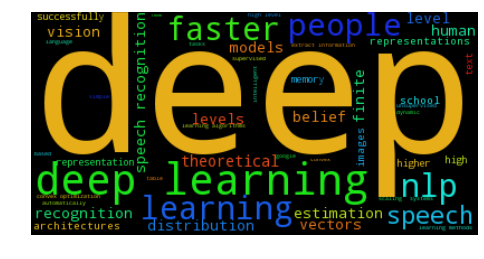

v v v v 	Topic #3	v v v v v

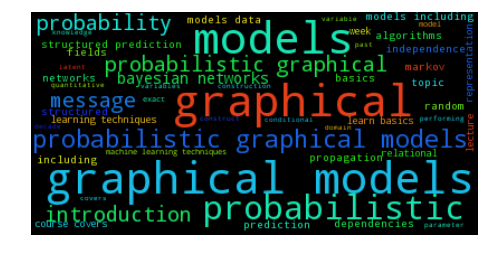

v v v v 	Topic #4	v v v v v

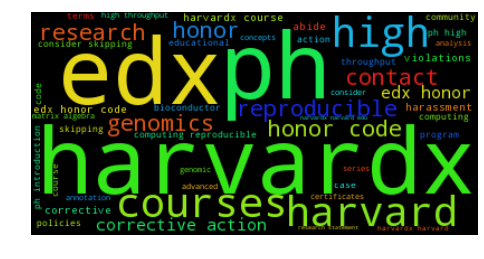

v v v v 	Topic #5	v v v v v

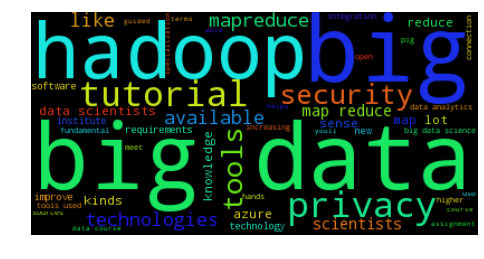

v v v v 	Topic #6	v v v v v

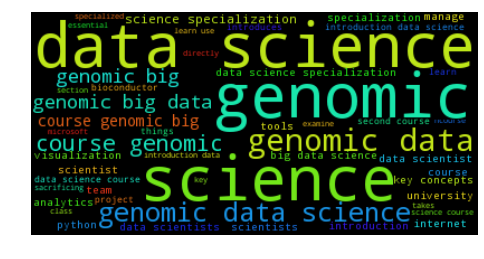

v v v v 	Topic #7	v v v v v

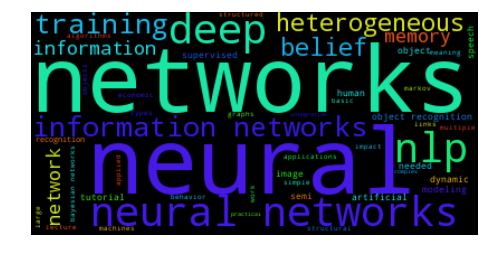

v v v v 	Topic #8	v v v v v

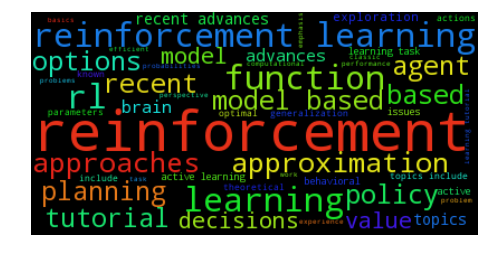

v v v v 	Topic #9	v v v v v

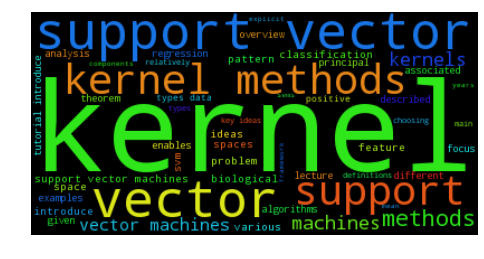

v v v v 	Topic #10	v v v v v

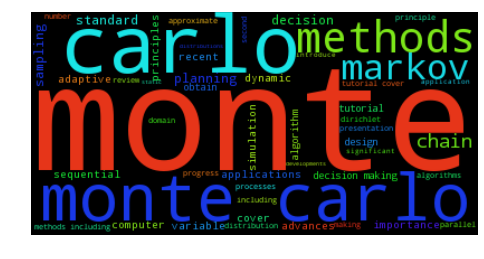

v v v v 	Topic #11	v v v v v

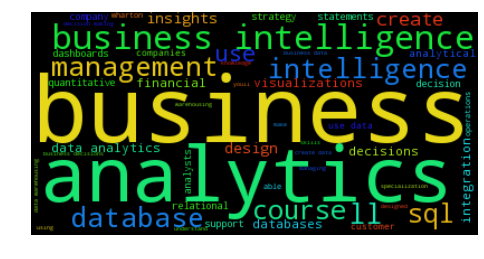

v v v v 	Topic #12	v v v v v

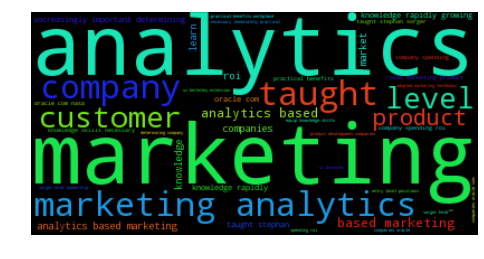

v v v v 	Topic #13	v v v v v

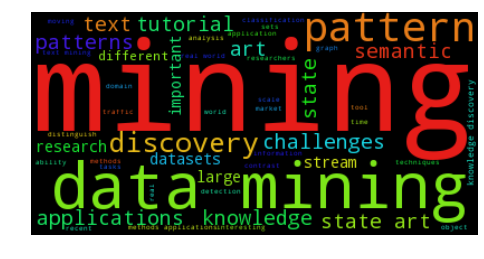

v v v v 	Topic #14	v v v v v

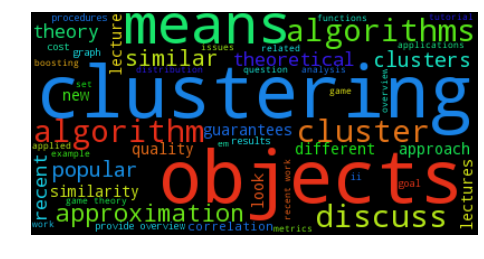

v v v v 	Topic #15	v v v v v

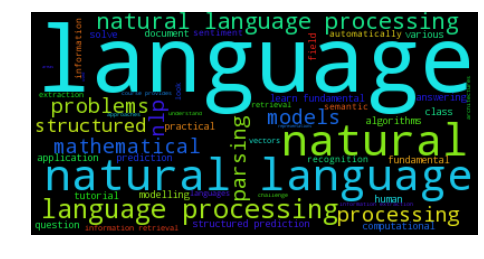

v v v v 	Topic #16	v v v v v

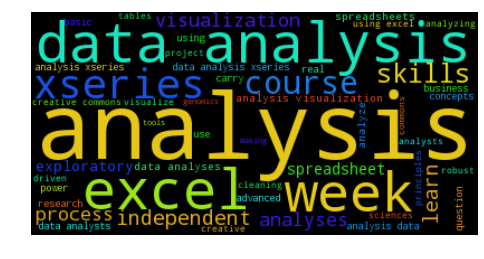

v v v v 	Topic #17	v v v v v

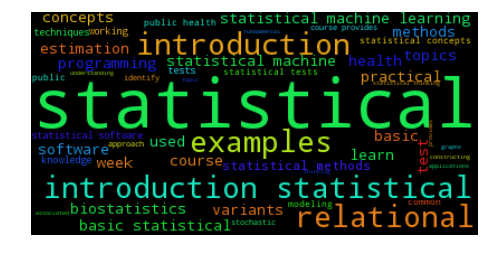

v v v v 	Topic #18	v v v v v

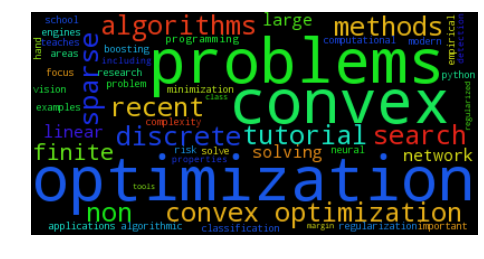

v v v v 	Topic #19	v v v v v

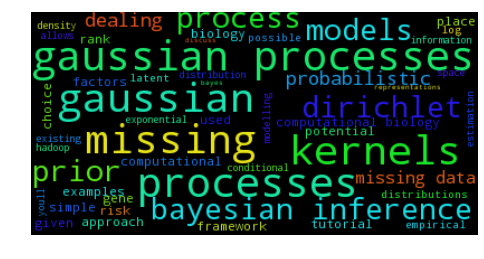

v v v v 	Topic #20	v v v v v

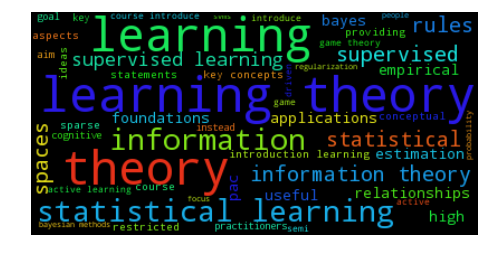

v v v v 	Topic #21	v v v v v

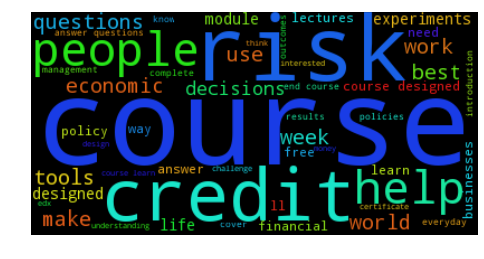

v v v v 	Topic #22	v v v v v

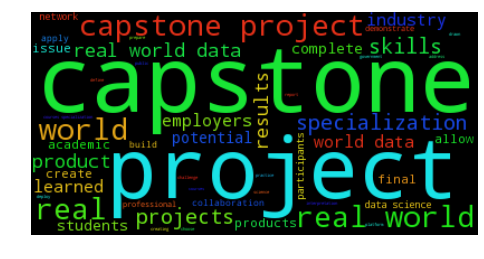

v v v v 	Topic #23	v v v v v

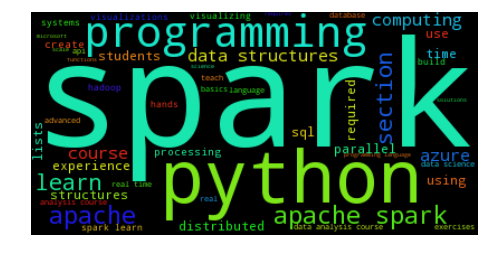

v v v v 	Topic #24	v v v v v

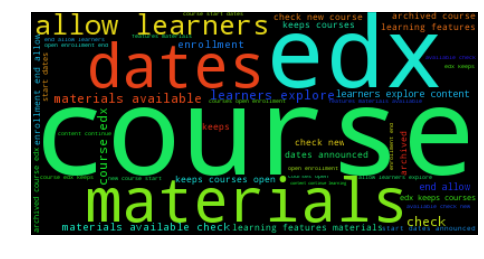

v v v v 	Topic #25	v v v v v

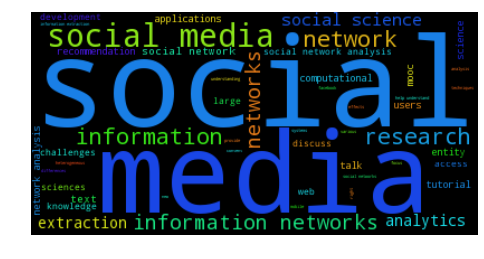

v v v v 	Topic #26	v v v v v

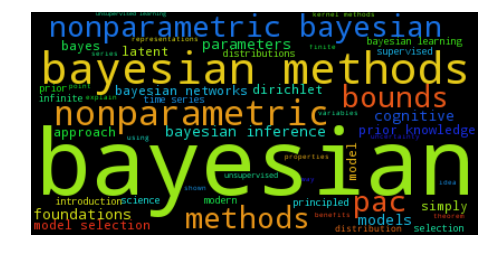

v v v v 	Topic #27	v v v v v

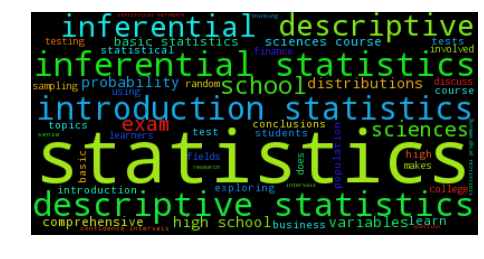

v v v v 	Topic #28	v v v v v

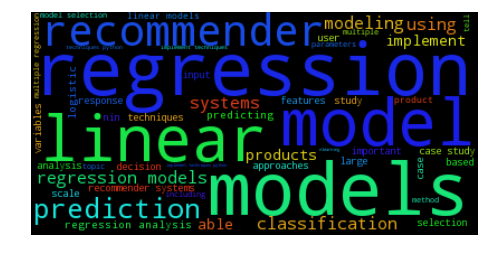

v v v v 	Topic #29	v v v v v

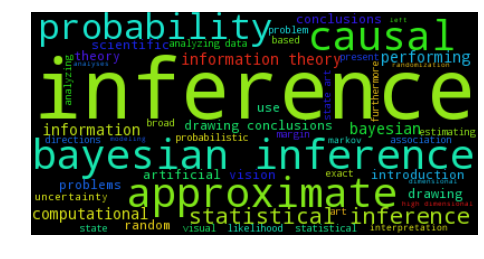

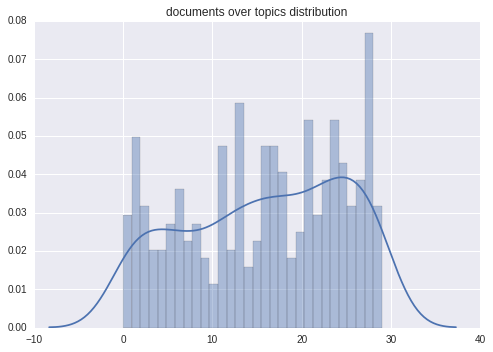

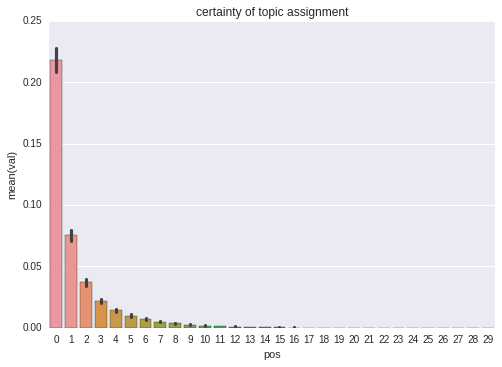

nmf shape: (458, 30)
458


In [5]:
clf = CLF(n_topics=30)
print('# resources:', len(df))
nmf = clf.fit_transform(df[['title', 'subtitle', 'description', 'syllabus']], viz=True)

In [6]:
%run ../basics.ipynb
prereq = cross_entropy_prereq(nmf, th=0.000, entropy_ge=True, cross_entropy_diff=True)

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

100%|██████████| 458/458 [00:13<00:00, 33.31it/s]


In [7]:
prereq['prereq'].values

array([  0,   0,   0, ..., 456, 456, 456])

In [8]:
title_col_idx = df.columns.tolist().index('title')
prereq['course'] = map(lambda x: df.iat[x, title_col_idx], prereq['t'].values)
prereq['course prereq'] = map(lambda x: df.iat[x, title_col_idx], prereq['prereq'].values)

venue_col_idx = df.columns.tolist().index('venue')
prereq['course venue'] = map(lambda x: df.iat[x, venue_col_idx], prereq['t'])
prereq['prereq venue'] = map(lambda x: df.iat[x, venue_col_idx], prereq['prereq'])
prereq.head(2)

,t,prereq,val,course,course prereq,course venue,prereq venue
0,1,0,0.040656,A/B Testing,Intro to Computer Science,Udacity,Udacity
1,2,0,0.261414,Data Visualization and D3.js,Intro to Computer Science,Udacity,Udacity


In [9]:
prereq = prereq[prereq['course venue'] == prereq['prereq venue']]
prereq.sort_values(by='val', ascending=False, inplace=True)
prereq[['course', 'course prereq', 'val']].head(200)

,course,course prereq,val
25417,Statistically Sound Pattern Discovery - Video...,"Probability, Information Theory and Bayesian I...",5.635343
22941,Statistically Sound Pattern Discovery - Video...,Introduction To Bayesian Inference - VideoLect...,5.603686
14981,Statistically Sound Pattern Discovery - Video...,Inference in Graphical Models - VideoLectures.NET,5.124179
18687,Statistically Sound Pattern Discovery - Video...,Bayesian Inference - VideoLectures.NET,4.905637
29137,Mining Uncertain and Probabilistic Data: probl...,Bayesian inference and Gaussian processes - Vi...,4.780877
9034,Statistics: Making Sense of Data,Big Data - Capstone Project,4.730000
29124,Independent Component Analysis - VideoLectures...,Bayesian inference and Gaussian processes - Vi...,4.473017
29131,Query Log Mining - VideoLectures.NET,Bayesian inference and Gaussian processes - Vi...,4.285038
23593,Statistically Sound Pattern Discovery - Video...,Causal Inference as Computational Learning - V...,4.003871
6637,Reproducible Research,Statistical Inference,3.960644


In [10]:
prereq.head(2)

,t,prereq,val,course,course prereq,course venue,prereq venue
25417,294,262,5.635343,Statistically Sound Pattern Discovery - Video...,"Probability, Information Theory and Bayesian I...",Videolectures.net,Videolectures.net
22941,294,232,5.603686,Statistically Sound Pattern Discovery - Video...,Introduction To Bayesian Inference - VideoLect...,Videolectures.net,Videolectures.net


In [24]:
prereq['udacity_gt'] = prereq.apply(lambda x: ' '.join(df[df['id'] == x['t']]['prereq'].values.tolist()), axis=1)

In [25]:
print(prereq['udacity_gt'].apply(lambda x: x.strip() != '').sum(), 
      len(prereq), df['prereq'].apply(lambda x: x.strip() != '').sum())

0 13902 11
